## Comparison of Models
--- 
In this section, we will be comparing and analysing the performance of the 3 ML models we have utilized.

In [1]:
# importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt # data visualization
import ipywidgets as widgets # interactive widgets
from ipywidgets import Box

In [2]:
%store -r model_random_forest_improved
%store -r model_regression


In [3]:
# Load the dataset into a pandas dataframe
RefinedMusicData = pd.read_csv('../Data/tracks_cleaned.csv')
RefinedMusicData.drop(['release_date','key'],axis=1,inplace=True)
RefinedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        469281 non-null  int64  
 1   duration_ms       469281 non-null  int64  
 2   explicit          469281 non-null  int64  
 3   danceability      469281 non-null  float64
 4   energy            469281 non-null  float64
 5   loudness          469281 non-null  float64
 6   mode              469281 non-null  int64  
 7   speechiness       469281 non-null  float64
 8   acousticness      469281 non-null  float64
 9   instrumentalness  469281 non-null  float64
 10  liveness          469281 non-null  float64
 11  valence           469281 non-null  float64
 12  tempo             469281 non-null  float64
 13  time_signature    469281 non-null  int64  
 14  num_artists       469281 non-null  int64  
 15  year              469281 non-null  int64  
dtypes: float64(9), int64

In [4]:
# Data cleaning and arrangement
time_signature_df=pd.get_dummies(RefinedMusicData["time_signature"])
time_signature_df.columns = time_signature_df.columns.astype(str)
RefinedMusicData = pd.concat([RefinedMusicData,time_signature_df],axis=1)
RefinedMusicData['mode'] = np.where(RefinedMusicData['mode']=='Major', 1, 0)

In [5]:
# data modelling
X= RefinedMusicData.loc[:,RefinedMusicData.columns !="popularity"] # all the features accept popularity
y = RefinedMusicData["popularity"] # the popularity
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       469281 non-null  int64  
 1   explicit          469281 non-null  int64  
 2   danceability      469281 non-null  float64
 3   energy            469281 non-null  float64
 4   loudness          469281 non-null  float64
 5   mode              469281 non-null  int64  
 6   speechiness       469281 non-null  float64
 7   acousticness      469281 non-null  float64
 8   instrumentalness  469281 non-null  float64
 9   liveness          469281 non-null  float64
 10  valence           469281 non-null  float64
 11  tempo             469281 non-null  float64
 12  time_signature    469281 non-null  int64  
 13  num_artists       469281 non-null  int64  
 14  year              469281 non-null  int64  
 15  0                 469281 non-null  uint8  
 16  1                 46

In [6]:
# separate the data to training and testing
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [7]:
 #creating a regression model
from sklearn.tree import DecisionTreeRegressor
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# estimate the R² score on training and testing data
# (1) Linear regression
print("Linear Regression Train Set R^2: " + str(model_regression.score(X_train,y_train)))
print("Linear Regression Test Set R^2: " + str(model_regression.score(X_test,y_test)))

# (2) Random Forest
print("Random Forest Train Set R^2: " + str(model_random_forest_improved.score(X_train,y_train)))
print("Random Forest Test Set R^2: " + str(model_random_forest_improved.score(X_test,y_test)))
# (3) Decision Tree
print("Decision Tree Train Set R^2: " + str(model_decision_tree.score(X_train,y_train)))
print("Decision Tree Test Set R^2: " + str(model_decision_tree.score(X_test,y_test)))



Linear Regression Train Set R^2: 0.3764622155130122
Linear Regression Test Set R^2: 0.3766737280016472
Random Forest Train Set R^2: 0.5802897282525677
Random Forest Test Set R^2: 0.5812024827041535
Decision Tree Train Set R^2: 0.9949953045309092
Decision Tree Test Set R^2: 0.04042260784842222


Comparing the 3 models we observe that the random forests perform best on the test set as compared to the rest. The decision tree performs extremely well on the train set but poorly on the test set. Hence, it is likely overfitting the model.

However, if we simply look at the R^2 value, the random forest's R^2 value is not impressive. We could look ta using RMSE and MSE to evaluate the models.

---

In [9]:
from sklearn.metrics import mean_squared_error

# calculate the predictions on training and testing data
y_train_pred = model_regression.predict(X_train)
y_test_pred = model_regression.predict(X_test)

# calculate the RMSE and MSE on training and testing data for linear regression
print("Linear Regression Train Set RMSE: " + str(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Linear Regression Train Set MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("Linear Regression Test Set RMSE: " + str(mean_squared_error(y_test, y_test_pred, squared=False)))
print("Linear Regression Test Set MSE: " + str(mean_squared_error(y_test, y_test_pred)))

# calculate the predictions on training and testing data
y_train_pred = model_random_forest_improved.predict(X_train)
y_test_pred = model_random_forest_improved.predict(X_test)

# calculate the RMSE and MSE on training and testing data for random forest
print("Random Forest Train Set RMSE: " + str(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Random Forest Train Set MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("Random Forest Test Set RMSE: " + str(mean_squared_error(y_test, y_test_pred, squared=False)))
print("Random Forest Test Set MSE: " + str(mean_squared_error(y_test, y_test_pred)))

# calculate the predictions on training and testing data
y_train_pred = model_decision_tree.predict(X_train)
y_test_pred = model_decision_tree.predict(X_test)

# calculate the RMSE and MSE on training and testing data for decision tree
print("Decision Tree Train Set RMSE: " + str(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Decision Tree Train Set MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("Decision Tree Test Set RMSE: " + str(mean_squared_error(y_test, y_test_pred, squared=False)))
print("Decision Tree Test Set MSE: " + str(mean_squared_error(y_test, y_test_pred)))


Linear Regression Train Set RMSE: 14.49921342245031
Linear Regression Train Set MSE: 210.22718986976327
Linear Regression Test Set RMSE: 14.514861413576716
Linear Regression Test Set MSE: 210.68120185533826
Random Forest Train Set RMSE: 11.895641128656528
Random Forest Train Set MSE: 141.50627786178478
Random Forest Test Set RMSE: 11.897541458639473
Random Forest Test Set MSE: 141.55149276004508
Decision Tree Train Set RMSE: 1.2989782606070517
Decision Tree Train Set MSE: 1.6873445215297216
Decision Tree Test Set RMSE: 18.00923152185744
Decision Tree Test Set MSE: 324.3324200078637


Looking at the RMSE values, we observe that random forests performs the best as expected. The RMSE is 11.9. This means that on average, the difference between actual and predicted popularity differs by 11.9. 

This is a somewhat of a good model as popularity differing by 11 is acceptable. This is becasue besides the quality of the music there are other non-quantitative factors such as advertising and brand name that drives popularity as well. Given that we differ at most by 11, shows it is sound.

Furthemore, we notice that the other 2 models are not too far behind in its RMSE value. Hence, they are also a good attempt at predicting the popularity. This is unlike what the R^2 value suggests.

--- 

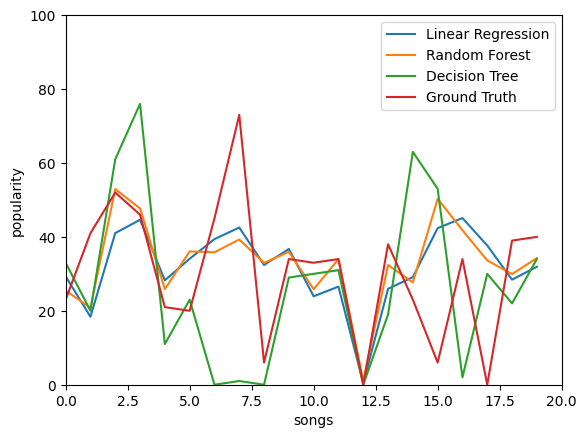

In [10]:
test_samples = 20 # amount of songs which would be evaluated
# initialized empty lists for the models predictions
regression = [] 
random_forest = [] 
decision_tree = []
ground_truth = []
# collecting the models' predictions 
for i in range(test_samples): 
    regression.append(model_regression.predict([X_test[i]])) 
    random_forest.append(model_random_forest_improved.predict([X_test[i]]))
    decision_tree.append(model_decision_tree.predict([X_test[i]]))
    ground_truth.append(y_test[i])
# Plotting the models' predictions in comparison to the ground truth
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
plt.legend()
plt.show()

Above we have plotted how the predicted popularity differs across the 3 models and the ground truth. We can observe that the deicision tree varies the most with the ground truth. This validates the highest RMSE value.

Random Forest tends to follow closely with the ground truth as compared to the other models.

The above models are a good start to helping us better predict the popularity of music. However, they can be improved. As observed in RandomForest.ipynb, doing some feature tuning can help us improve the accuracy of the model. However, doing so is computationally expensive. We need a way to fine tune the model but is less computationally expensive.